<a href="https://colab.research.google.com/github/ActiveStacks/ExperimentTwo/blob/main/EXPERIMENT_CODEBERTLLM_2E6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
#path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [ ]:
df = pd.read_csv(path6)

<ipython-input-4-3ae00e4e4eac>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path5)


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;


In [ ]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
197,197,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private static final String VERSION_KEY = ""ckC...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private static final String VERSION_KEY = ""use..."
825,825,SHA-1 is a weak hash known to have hash collis...,RegexOr,"['\\.getInstance\\(.*SHA-1', '\\.getInstance\\...","MessageDigest md = MessageDigest.getInstance(""...",warning,exact,5.9,CWE-327,Use of a Broken or Risky Cryptographic Algorithm,M5: Insufficient Cryptography,MSTG-CRYPTO-4,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"MessageDigest md = MessageDigest.getInstance(""..."
3345,3345,The App uses an insecure Random Number Generator.,Regex,java\.util\.Random(?!Access),import java.util.Random;,warning,exact,7.5,CWE-330,Use of Insufficiently Random Values,M5: Insufficient Cryptography,MSTG-CRYPTO-6,https://github.com/MobSF/owasp-mstg/blob/maste...,1,import java.util.Random;
3458,3458,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",File externalStorageDirectory = Environment.ge...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File externalStorageDirectory = Environment.ge...
5951,5951,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",return new File(Gdx.files.getExternalStoragePa...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return new File(Gdx.files.getExternalStoragePa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5511667,7772698,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",return new File(Uri.decode(Environment.getExte...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return new File(Uri.decode(Environment.getExte...
5511674,7772706,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",public static final String EXTRA_FRAGMENT_ARG_...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String EXTRA_FRAGMENT_ARG_...
5511675,7772707,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",private static final String ICON_BADGING_PREFE...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String ICON_BADGING_PREFE...
5511676,7772708,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",private static final String SAVE_HIGHLIGHTED_K...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String SAVE_HIGHLIGHTED_K...


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;


In [ ]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
5512120,7778585,This app listens to Clipboard changes. Some ma...,RegexAnd,"['content\\.ClipboardManager', 'OnPrimaryClipC...",$$Lambda$ClipboardListener$3E1KFC6kdnZyJGAyujs...,info,exact,0.0,NaN,NaN,NaN,MSTG-PLATFORM-4,https://github.com/MobSF/owasp-mstg/blob/maste...,1,$$Lambda$ClipboardListener$3E1KFC6kdnZyJGAyujs...
5512121,7778587,NaN,NaN,NaN,ClipboardListener.this.lambda$null$0$Clipboard...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,ClipboardListener.this.lambda$null$0$Clipboard...
5512122,7778589,NaN,NaN,NaN,clipboardManager.addPrimaryClipChangedListener...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,clipboardManager.addPrimaryClipChangedListener...
5512123,7778590,NaN,NaN,NaN,public /* synthetic */ void lambda$null$0$Clip...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment void lambda$null$0$ClipboardLis...
5512124,7778693,NaN,NaN,NaN,segment.pos = i;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,segment.pos = i;


In [ ]:
df.shape

(5512125, 15)

In [ ]:
df.describe()

,index,CVSS,Vulnerability_status
count,5.512125e+06,75142.000000,5.512125e+06
mean,3.612667e+06,6.990946,1.363213e-02
std,2.252909e+06,1.386911,1.159582e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,1.616480e+06,7.500000,0.000000e+00
50%,3.520025e+06,7.500000,0.000000e+00
75%,5.502330e+06,7.500000,0.000000e+00
max,7.778693e+06,8.800000,1.000000e+00


In [ ]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [ ]:
df.nunique()

,0
index,5512125
Description,30
Type,4
Pattern,30
Code,5495638
Severity,4
Input Case,2
CVSS,10
CWE_ID,13
CWE_Desc,13


In [ ]:
df['Vulnerability_status'].unique()

array([0, 1])

In [ ]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    5436983
1      75142
Name: count, dtype: int64


In [ ]:
df_safe = df[df['Vulnerability_status']==0]

In [ ]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [ ]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;


In [ ]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
5512119,7778584,NaN,NaN,NaN,this.cm = clipboardManager;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.cm = clipboardManager;
5512121,7778587,NaN,NaN,NaN,ClipboardListener.this.lambda$null$0$Clipboard...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,ClipboardListener.this.lambda$null$0$Clipboard...
5512122,7778589,NaN,NaN,NaN,clipboardManager.addPrimaryClipChangedListener...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,clipboardManager.addPrimaryClipChangedListener...
5512123,7778590,NaN,NaN,NaN,public /* synthetic */ void lambda$null$0$Clip...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment void lambda$null$0$ClipboardLis...
5512124,7778693,NaN,NaN,NaN,segment.pos = i;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,segment.pos = i;


In [ ]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
28,28,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,changeLog.init();,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,changeLog.init();
42,42,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(LOG_TAG, ""Could not get version informat...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(LOG_TAG, ""user_str"", e);"
120,120,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(MAIN_ACTIVITY_TAG, ""Settings could not b...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(MAIN_ACTIVITY_TAG, ""user_str"");"
177,177,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,return getDialog(this.changeLog.isFirstRunEver...,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return getDialog(this.changeLog.isFirstRunEver...
180,180,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,return this.changeLog.isFirstRun();,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return this.changeLog.isFirstRun();


In [ ]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
5511675,7772707,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",private static final String ICON_BADGING_PREFE...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String ICON_BADGING_PREFE...
5511676,7772708,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",private static final String SAVE_HIGHLIGHTED_K...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String SAVE_HIGHLIGHTED_K...
5511678,7772710,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private static final String attrKey = ""key"";",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private static final String attrKey = ""user_str"";"
5511680,7772743,App creates temp file. Sensitive information s...,Regex,\.createTempFile\(,"File createTempFile = File.createTempFile(str,...",warning,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,NaN,1,"File createTempFile = File.createTempFile(str,..."
5512120,7778585,This app listens to Clipboard changes. Some ma...,RegexAnd,"['content\\.ClipboardManager', 'OnPrimaryClipC...",$$Lambda$ClipboardListener$3E1KFC6kdnZyJGAyujs...,info,exact,0.0,NaN,NaN,NaN,MSTG-PLATFORM-4,https://github.com/MobSF/owasp-mstg/blob/maste...,1,$$Lambda$ClipboardListener$3E1KFC6kdnZyJGAyujs...


In [ ]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [ ]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [ ]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [ ]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    75142
1    75142
Name: count, dtype: int64


In [ ]:
print(df_balanced.value_counts())

index    Description                                                                                 Type     Pattern                                                                                                                                                                                            Code                                                                                                                                                         Severity  Input Case  CVSS  CWE_ID   CWE_Desc                                          OWASP_Mobile                   OWSAP_MASVS      Reference                                                                                                                                                            Vulnerability_status  processed_code                                                                                                                                             
7772710  Files may contain hardcoded sensitive information l

<Axes: >

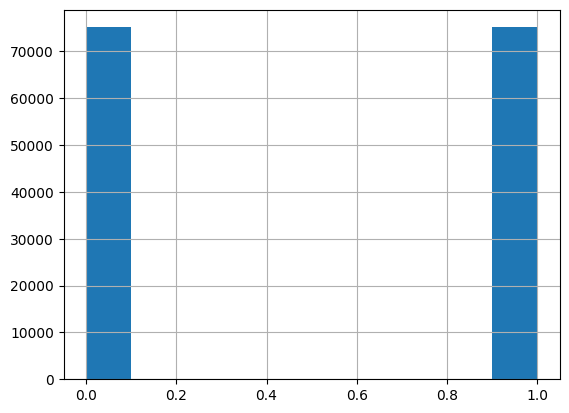

In [ ]:
df_balanced['Vulnerability_status'].hist()

In [ ]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,5523433,NaN,NaN,NaN,private final ImageInfo _inputinfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private final ImageInfo _inputinfo;
1,6326361,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"System.out.println(str + "" children "" + childC...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.println(str + ""user_str"" + childCou..."
2,3104305,NaN,NaN,NaN,} else if (SupportMenuInflater.XML_GROUP.equal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,} else if (SupportMenuInflater.XML_GROUP.equal...
3,1988339,NaN,NaN,NaN,return location instanceof DocumentTreeLocation;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return location instanceof DocumentTreeLocation;
4,6740401,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private static final String TERMTYPE_KEY = ""te...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private static final String TERMTYPE_KEY = ""us..."


In [ ]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [ ]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,5523433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private final ImageInfo _inputinfo;
1,6326361,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.println(str + ""user_str"" + childCou..."
2,3104305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,} else if (SupportMenuInflater.XML_GROUP.equal...
3,1988339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return location instanceof DocumentTreeLocation;
4,6740401,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private static final String TERMTYPE_KEY = ""us..."
5,7556560,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.println(""NanoHTTPD 1.24 (C) 2001,20..."
6,5645221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,cursor2.setNotificationUri(getContext().getCon...
7,3037467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static final String SETTING_ACKNOWLEDGE...
8,4742785,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(MapRendererView.TAG, ""user_str"");"
9,2725143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"this.N.put(156, new a(-1, 5, 18, 156, 0));"


In [ ]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
150274,2933225,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(fmMain.TAG, ""user_str"" + e.getMessage());"
150275,2835133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private final e<?> f9983a;
150276,3727467,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(DeviceConnection.this.TAG, ""user_str"");"
150277,2320391,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"android.util.Log.e(getTag(), formatMessage(str..."
150278,1888603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,DNSFilterService.stop(true);
150279,3567423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.f2371a = aSBTalismanListViewModel;
150280,1929158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,touchImageView.setVisibility(0);
150281,2968259,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(Constants.TAG, String.format(""user_str"",..."
150282,5438139,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str"" + searchStyle2);"
150283,7065509,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File externalStorageDirectory = (intent4 == nu...


In [ ]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
4,6740401,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private static final String TERMTYPE_KEY = ""us..."
11,6044228,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,new FolderChooserDialogCreate.Builder(Settings...
16,3241975,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String SETTINGS_USE_ANALYT...
28,753088,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return PhoneNumberUtil$$ExternalSyntheticOutli...
47,4253131,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"addIfExists(arrayList, standardDirectory.getIc..."
...,...,...,...,...,...,...,...,...,...,...
150217,4412590,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String FOLDER_BROWSING_DEF...
150227,866976,RegexAnd,"['setJavaScriptEnabled\\(true\\)', 'addJavascr...",exact,8.8,M1: Improper Platform Usage,MSTG-PLATFORM-7,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"webView.addJavascriptInterface(new i(this, nul..."
150250,5467126,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File file = new File(Environment.getExternalSt...
150252,748561,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"return ""user_str"" + str + ""user_str"" + list + ..."


In [ ]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [ ]:
df_balanced.head()

,processed_code,Vulnerability_status
0,private final ImageInfo _inputinfo;,0
1,"System.out.println(str + ""user_str"" + childCou...",1
2,} else if (SupportMenuInflater.XML_GROUP.equal...,0
3,return location instanceof DocumentTreeLocation;,0
4,"private static final String TERMTYPE_KEY = ""us...",1


In [ ]:
df_balanced.columns = ['text', 'labels']

In [ ]:
df_balanced.head(5)

,text,labels
0,private final ImageInfo _inputinfo;,0
1,"System.out.println(str + ""user_str"" + childCou...",1
2,} else if (SupportMenuInflater.XML_GROUP.equal...,0
3,return location instanceof DocumentTreeLocation;,0
4,"private static final String TERMTYPE_KEY = ""us...",1


In [ ]:
df_balanced.head(5)

,text,labels
0,private final ImageInfo _inputinfo;,0
1,"System.out.println(str + ""user_str"" + childCou...",1
2,} else if (SupportMenuInflater.XML_GROUP.equal...,0
3,return location instanceof DocumentTreeLocation;,0
4,"private static final String TERMTYPE_KEY = ""us...",1


In [ ]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

In [ ]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 150284
    })
})

In [ ]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 120227
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 30057
    })
})

In [ ]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [ ]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [ ]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/120227 [00:00<?, ? examples/s]

Map:   0%|          | 0/30057 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [ ]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'binary')
  return {'accuracy' : acc, 'f1':f1}

In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-56-e5df01f81142>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.063000,0.070661,0.985993,0.986031
2,0.045900,0.044999,0.991017,0.991067


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.063000,0.070661,0.985993,0.986031
2,0.045900,0.044999,0.991017,0.991067
